# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
import sklearn
print(sklearn.__version__)

0.24.1


# Loading Data

In [3]:
df =pd.read_excel("/Users/karmachoden/Desktop/ITS307/mini project/data.xlsx")
df.head()

From                         To    km  fuel_price  fuel_consumption  \
0  Nganglam  Nganglam Marung ( mining)  13.0       92.01              1.04   
1  Nganglam            Nganglam Kerung  16.0       92.01              1.28   
2  Nganglam      Nganglam Chhokhorling  21.0       92.01              1.68   
3  Nganglam        Nganglam Dechheling  23.0       92.01              1.84   
4  Nganglam         Nganglam Norbugang  25.0       92.01              2.00   

   taxi_fare  
0       96.0  
1      118.0  
2      155.0  
3      169.0  
4      184.0

In [4]:
df.tail()

From               To    km  fuel_price  fuel_consumption  \
529      Damphu Town        Dhupidara  10.0       92.01              0.80   
530      Damphu Town        Changchey  12.0       92.01              0.96   
531      Damphu Town         Lamidara  18.0       92.01              1.44   
532      Damphu Town          Sunkosh  20.0       92.01              1.60   
533  Gedu Zero Point  Laptshakha Town   1.0       92.01              0.08   

     taxi_fare  
529    73.6080  
530    88.3296  
531   132.4944  
532   147.2160  
533     7.3608

In [5]:
df.shape

(534, 6)

# Data Preprocessing

In [6]:
df.isnull().sum()

From                0
To                  0
km                  0
fuel_price          0
fuel_consumption    0
taxi_fare           0
dtype: int64

In [7]:
df.dtypes

From                 object
To                   object
km                  float64
fuel_price          float64
fuel_consumption    float64
taxi_fare           float64
dtype: object

In [8]:
df['km'] = df['km'].astype(int)
df['taxi_fare'] = df['taxi_fare'].astype(int)

df.dtypes

From                 object
To                   object
km                    int64
fuel_price          float64
fuel_consumption    float64
taxi_fare             int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   From              534 non-null    object 
 1   To                534 non-null    object 
 2   km                534 non-null    int64  
 3   fuel_price        534 non-null    float64
 4   fuel_consumption  534 non-null    float64
 5   taxi_fare         534 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 25.2+ KB


In [10]:
df.describe()

km    fuel_price  fuel_consumption    taxi_fare
count  534.000000  5.340000e+02        534.000000   534.000000
mean    18.116105  9.201000e+01          1.453408   133.035581
std     23.621261  2.133627e-13          1.893462   173.845721
min      0.000000  9.201000e+01          0.000000     0.000000
25%      4.000000  9.201000e+01          0.320000    29.000000
50%      9.000000  9.201000e+01          0.720000    66.000000
75%     20.000000  9.201000e+01          1.600000   147.000000
max    140.000000  9.201000e+01         11.200000  1030.000000

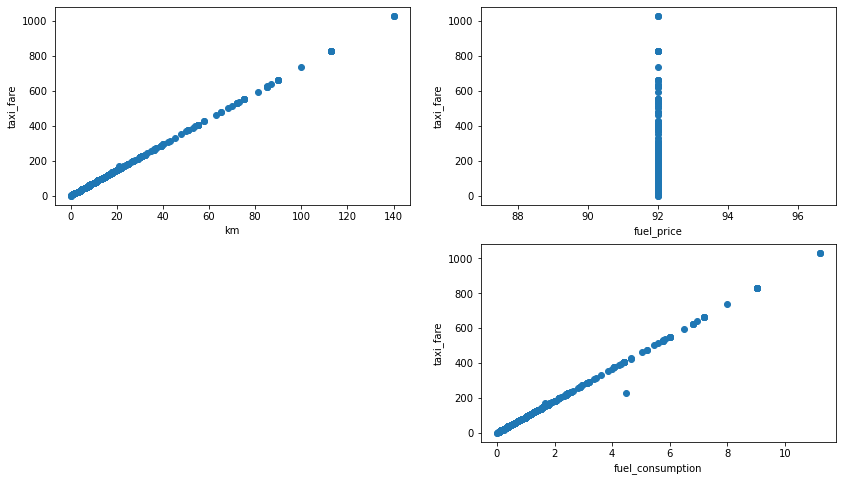

In [11]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=df["km"], y=df["taxi_fare"])
plt.xlabel("km")
plt.ylabel("taxi_fare")

plt.subplot(2, 2, 2)
plt.scatter(x=df["fuel_price"], y=df["taxi_fare"])
plt.xlabel("fuel_price")
plt.ylabel("taxi_fare")

plt.subplot(2, 2, 4)
plt.scatter(x=df["fuel_consumption"], y=df["taxi_fare"])
plt.xlabel("fuel_consumption")
plt.ylabel("taxi_fare")

plt.savefig("scatterplots1.png", bbox_inches="tight")
plt.show()

# Removing Duplicate Value

In [12]:
print("There are {} duplicate values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

There are 73 duplicate values.


From                  To  km  fuel_price  fuel_consumption  \
63  City Centre Parking    Hotel river view   3       92.01              0.24   
64  City Centre Parking      Kuensel Office   3       92.01              0.24   
65  City Centre Parking      Jamyang Resort   3       92.01              0.24   
66  City Centre Parking         Druk School   3       92.01              0.24   
67  City Centre Parking       Motithang BOD   3       92.01              0.24   
68  City Centre Parking         Changbangdu   3       92.01              0.24   
69  City Centre Parking         JICA Office   3       92.01              0.24   
70  City Centre Parking  Dzong parking gate   3       92.01              0.24   
71  City Centre Parking   Kelki High School   3       92.01              0.24   
72  City Centre Parking    Memorial Chorten   3       92.01              0.24   

    taxi_fare  
63         22  
64         22  
65         22  
66         22  
67         22  
68         22  
69         22  
70         22  
71         22  
72         22

In [13]:
# remove duplicate values
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [14]:
print("There are {} duplicate values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

There are 0 duplicate values.


Empty DataFrame
Columns: [From, To, km, fuel_price, fuel_consumption, taxi_fare]
Index: []

# Outliers Dectection

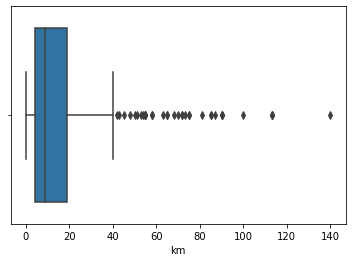

In [15]:
sns.boxplot(x=df['km'])
plt.show()

In [16]:
 # calculating IQR and upper limit and lower limit to find outliers
Q1 = df.km.quantile(0.25)
Q3 = df.km.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [17]:
#Checking the outliers
df[(df.km < lowerlimit)  | (df.km > upperlimit)]

From                              To   km  \
7                       Nganglam                Nganglam Panbang   55   
34                       Wangdue                 Wangdue Nobding   42   
35                       Wangdue                  Wangdue Lawala   54   
36                       Wangdue             Wangdue Ganteygompa   58   
37                       Wangdue               Wangdue Phobjikha   68   
54   Phuntsholing (Taxi Parking)                            Gedu   48   
123                     Zhemgang                Zhemgang Panbang  113   
129                     Zhemgang                 Zhemgang Goling   51   
130                     Zhemgang                   Zhemgang Buli   55   
131                     Zhemgang                Zhemgang Parling   72   
132                     Zhemgang                 Zhemgang Gomphu   75   
133                     Zhemgang                Zhemgang Rendibi   85   
134                     Zhemgang                Zhemgang Pantang   90   
246              Gedu Zero Point                          Bongoo   43   
247                     Zhemgang                Zhemgang Panbang  113   
250                     Zhemgang                   Zhemgang Buli   55   
251                     Zhemgang                Zhemgang Parling   72   
252                     Zhemgang                Zhemgang Rendibi   85   
253                     Zhemgang                Zhemgang Pantang   90   
254                     Zhemgang               Zhemgang Pangbang  113   
255                     Zhemgang                 Zhemgang Bjokha  140   
287          Mongar Taxi parking                 Mongar Yongkola   50   
288          Mongar Taxi parking    Mongar Drepong(Gewog Centre)   53   
289          Mongar Taxi parking    Mongar Chaskar(Gewog Centre)   55   
290          Mongar Taxi parking   Mongar Sershong(Gewog Centre)   58   
291          Mongar Taxi parking      Mongar Balam(Gewog Centre)   65   
292          Mongar Taxi parking  Mongar Khengkhar(Gewog Centre)   70   
293          Mongar Taxi parking    Mongar Tsamang(Gewog Centre)   73   
294          Mongar Taxi parking   Mongar Thanrong(Gewog Centre)   75   
295          Mongar Taxi parking     Mongar Jurmey(Gewog Centre)   81   
296          Mongar Taxi parking  Mongar Drametse (Gewog Centre)   87   
297          Mongar Taxi parking   Mongar Silambee(Gewog Centre)   90   
298          Mongar Taxi parking          Mongar Dremetse Narang  100   
315                  Pemagatshel                          Yurung   45   
316                  Pemagatshel                            Khar   55   
317                  Pemagatshel                         Chimung   63   
318                  Pemagatshel                         Dungmin   65   

     fuel_price  fuel_consumption  taxi_fare  
7         92.01              4.40        405  
34        92.01              3.36        309  
35        92.01              4.32        397  
36        92.01              4.64        427  
37        92.01              5.44        501  
54        92.01              3.84        353  
123       92.01              9.04        832  
129       92.01              4.08        375  
130       92.01              4.40        405  
131       92.01              5.76        530  
132       92.01              6.00        552  
133       92.01              6.80        626  
134       92.01              7.20        663  
246       92.01              3.44        316  
247       92.01              9.04        831  
250       92.01              4.40        404  
251       92.01              5.76        529  
252       92.01              6.80        625  
253       92.01              7.20        662  
254       92.01              9.04        831  
255       92.01             11.20       1030  
287       92.01              4.00        368  
288       92.01              4.24        390  
289       92.01              4.40        404  
290       92.01              4.64        426  
291       92.01              5.

In [18]:
# Droping the rows containing height beyond lower and upper limit.
df1 = df[(df.km > lowerlimit) & (df.km < upperlimit)]
df1.shape

(424, 6)

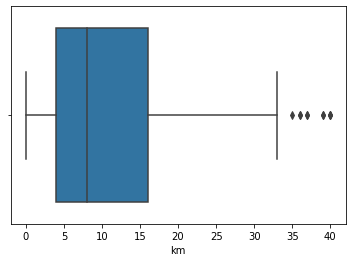

In [19]:
sns.boxplot(x=df1['km'])
plt.show()

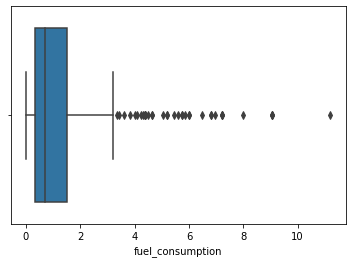

In [20]:
sns.boxplot(x=df['fuel_consumption'])
plt.show()

In [21]:
 # calculating IQR and upper limit and lower limit to find outliers
Q1 = df.fuel_consumption.quantile(0.25)
Q3 = df.fuel_consumption.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [22]:
#Checking the outliers
df[(df.fuel_consumption < lowerlimit)  | (df.fuel_consumption > upperlimit)]

From                              To   km  \
5                       Nganglam               Nganglam Yangbari   31   
7                       Nganglam                Nganglam Panbang   55   
34                       Wangdue                 Wangdue Nobding   42   
35                       Wangdue                  Wangdue Lawala   54   
36                       Wangdue             Wangdue Ganteygompa   58   
37                       Wangdue               Wangdue Phobjikha   68   
54   Phuntsholing (Taxi Parking)                            Gedu   48   
123                     Zhemgang                Zhemgang Panbang  113   
129                     Zhemgang                 Zhemgang Goling   51   
130                     Zhemgang                   Zhemgang Buli   55   
131                     Zhemgang                Zhemgang Parling   72   
132                     Zhemgang                 Zhemgang Gomphu   75   
133                     Zhemgang                Zhemgang Rendibi   85   
134                     Zhemgang                Zhemgang Pantang   90   
246              Gedu Zero Point                          Bongoo   43   
247                     Zhemgang                Zhemgang Panbang  113   
250                     Zhemgang                   Zhemgang Buli   55   
251                     Zhemgang                Zhemgang Parling   72   
252                     Zhemgang                Zhemgang Rendibi   85   
253                     Zhemgang                Zhemgang Pantang   90   
254                     Zhemgang               Zhemgang Pangbang  113   
255                     Zhemgang                 Zhemgang Bjokha  140   
287          Mongar Taxi parking                 Mongar Yongkola   50   
288          Mongar Taxi parking    Mongar Drepong(Gewog Centre)   53   
289          Mongar Taxi parking    Mongar Chaskar(Gewog Centre)   55   
290          Mongar Taxi parking   Mongar Sershong(Gewog Centre)   58   
291          Mongar Taxi parking      Mongar Balam(Gewog Centre)   65   
292          Mongar Taxi parking  Mongar Khengkhar(Gewog Centre)   70   
293          Mongar Taxi parking    Mongar Tsamang(Gewog Centre)   73   
294          Mongar Taxi parking   Mongar Thanrong(Gewog Centre)   75   
295          Mongar Taxi parking     Mongar Jurmey(Gewog Centre)   81   
296          Mongar Taxi parking  Mongar Drametse (Gewog Centre)   87   
297          Mongar Taxi parking   Mongar Silambee(Gewog Centre)   90   
298          Mongar Taxi parking          Mongar Dremetse Narang  100   
315                  Pemagatshel                          Yurung   45   
316                  Pemagatshel                            Khar   55   
317                  Pemagatshel                         Chimung   63   
318                  Pemagatshel                         Dungmin   65   

     fuel_price  fuel_consumption  taxi_fare  
5         92.01              4.48        228  
7         92.01              4.40        405  
34        92.01              3.36        309  
35        92.01              4.32        397  
36        92.01              4.64        427  
37        92.01              5.44        501  
54        92.01              3.84        353  
123       92.01              9.04        832  
129       92.01              4.08        375  
130       92.01              4.40        405  
131       92.01              5.76        530  
132       92.01              6.00        552  
133       92.01              6.80        626  
134       92.01              7.20        663  
246       92.01              3.44        316  
247       92.01              9.04        831  
250       92.01              4.40        404  
251       92.01              5.76        529  
252       92.01              6.80        625  
253       92.01              7.20        662  
254       92.01              9.04        831  
255       92.01             11.20       1030  
287       92.01              4.00        368  
288       92.01              4.24        390  
289  

In [23]:
# Droping the rows containing height beyond lower and upper limit.
df1 = df[(df.fuel_consumption > lowerlimit) & (df.fuel_consumption < upperlimit)]
df1.shape

(423, 6)

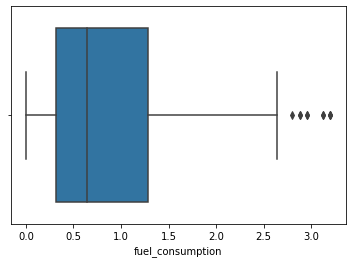

In [24]:
sns.boxplot(x=df1['fuel_consumption'])
plt.show()

# Model Training

In [25]:
#separate data into X features and Y target
X = df.drop(columns=["taxi_fare"])
Y = df["taxi_fare"]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 5)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [28]:
n_cols = X.select_dtypes(include=['int64','float64']).columns
n_cols

Index(['km', 'fuel_price', 'fuel_consumption'], dtype='object')

In [29]:
c_cols = X.select_dtypes(include=['object']).columns
c_cols

Index(['From', 'To'], dtype='object')

In [30]:
n_index = [X.columns.get_loc(col) for col in n_cols]
n_index

[2, 3, 4]

In [31]:
c_index = [X.columns.get_loc(col) for col in c_cols]
c_index

[0, 1]

In [32]:
n_transform = Pipeline(steps=
                      [
                          ('scale',StandardScaler()),
                      ])

In [33]:
c_transform = Pipeline(steps=
                      [
                          ('imputeN',SimpleImputer(strategy = 'most_frequent')),
                          ('oneHot',OneHotEncoder(handle_unknown='ignore')),
                      ])

In [34]:
from sklearn.compose import ColumnTransformer
pre = ColumnTransformer(transformers=
                       [
                           ('numeric',n_transform, n_index),
                           ('categorical',c_transform,c_index)
                       ])

# Multi-Linear Regression

In [35]:
estimator = LinearRegression()


In [36]:
pipelinemodel = Pipeline(steps = 
                        [
                            ('preprocessing',pre),
                            ('est',estimator)
                        ])

In [37]:
X_train

From                                    To  km  \
132                  Zhemgang                       Zhemgang Gomphu  75   
450             Sarpang  Town                       Sarpang Leopani  11   
176         RSTA bus terminal                 India house, junshina   6   
55        City Centre Parking                         YHS Audtorium   2   
223       City Centre Parking  Babesa Roundabout (Via Express Road)   7   
..                        ...                                   ...  ..   
400      Punakha Taxi Parking                      Punakha Sirigang  10   
118       City Centre Parking                        Tangu Gentshwa  19   
189         RSTA bus terminal                      Singeygang - BBS   8   
206         RSTA bus terminal                              Chuzomsa  31   
355  Haa Throm (Taxi Parking)                             Haa Shari  18   

     fuel_price  fuel_consumption  
132       92.01              6.00  
450       92.01              0.88  
176       92.01              0.48  
55        92.01              0.16  
223       92.01              0.56  
..          ...               ...  
400       92.01              0.80  
118       92.01              1.52  
189       92.01              0.64  
206       92.01              2.48  
355       92.01              1.44  

[345 rows x 5 columns]

In [38]:
y_train

132    552
450     80
176     44
55      15
223     51
      ... 
400     73
118    140
189     58
206    228
355    132
Name: taxi_fare, Length: 345, dtype: int64

In [39]:
X_test

From                           To  km  fuel_price  \
43   Phuntsholing (Taxi Parking)          Phuntsholing Toorsa   1       92.01   
209          City Centre Parking              Imtrat Hospital   2       92.01   
240              Gedu Zero Point       DGPC Rinchentse (BNBL)  16       92.01   
378                   Khuruthang         Khuruthang Tshiyakha   8       92.01   
282          Mongar Taxi parking             Mongar Ngatshang  32       92.01   
..                           ...                          ...  ..         ...   
447                    Chargarey                  Kuchi Daina  15       92.01   
456                  Damphu Town                    Dhupidara  10       92.01   
184            RSTA bus terminal  Simtokha ILCS - Girls Hoste   7       92.01   
340     Haa Throm (Taxi Parking)           Haa Imtart Canteen   3       92.01   
360         Wangdue Taxi parking               Wangdue Rabuna   4       92.01   

     fuel_consumption  
43               0.08  
209              0.16  
240              1.28  
378              0.64  
282              2.56  
..                ...  
447              1.20  
456              0.80  
184              0.56  
340              0.24  
360              0.32  

[116 rows x 5 columns]

In [40]:
y_test

43       7
209     14
240    117
378     58
282    235
      ... 
447    110
456     73
184     51
340     22
360     29
Name: taxi_fare, Length: 116, dtype: int64

In [41]:
X_train = X_train.values

In [42]:
type(X_train)

numpy.ndarray

In [43]:
X_test = X_test.values

In [44]:
type(X_test)

numpy.ndarray

In [45]:
pipelinemodel.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 3, 4]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1])])),
                ('est', LinearRegression())])

In [46]:
from sklearn import set_config
set_config(display = 'diagram')
pipelinemodel.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 3, 4]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1])])),
                ('est', LinearRegression())])

In [47]:
# make predictions
y_pred = pipelinemodel.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9999624264190168


In [49]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Liner Regression RMSE: {}".format(lin_rmse))

Liner Regression RMSE: 0.7878536378636113


In [50]:
pipelinemodel.score(X_train,y_train)

0.999986565656304

In [51]:
pipelinemodel.score(X_test,y_test)

0.9999624264190168

In [52]:
data = [["Wangdue Taxi parking","Wangdue Rabuna",4,92.01,0.32]]
pipelinemodel.predict(data)

array([27.60878524])

Text(0.5, 1.0, 'Actual Vs. Predicted')

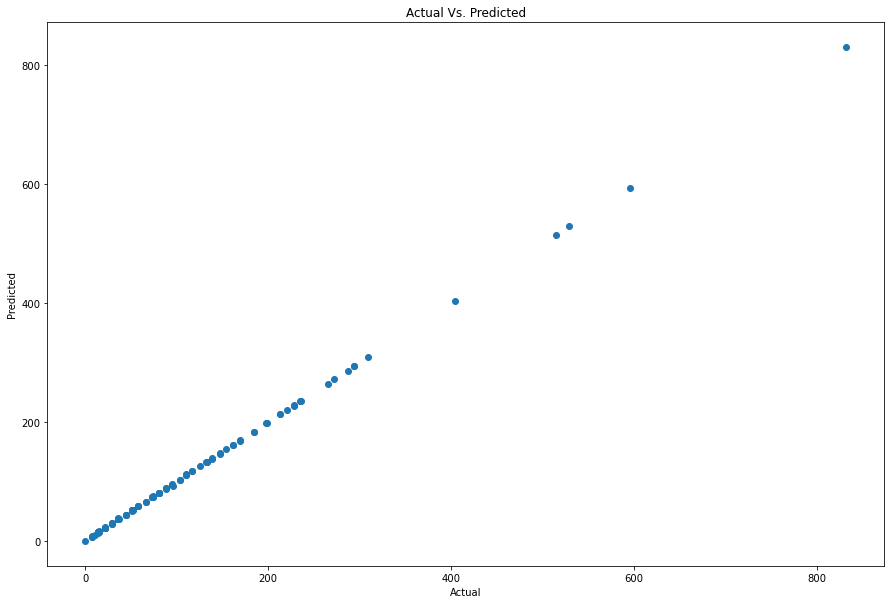

In [53]:
#Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs. Predicted')

In [54]:
import pickle
pickle.dump(pipelinemodel,open("/Users/karmachoden/Desktop/ITS307/mini project/minimodel.pkl",'wb'))

# Thank You!